# 1) DRAW LINE WITH THINNING TRANSLATION ROTATION

### a) function draw center line

In [1]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
import os
import time

print(cv2.__version__)

def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

def translate_image(image,p_width,p_height):
    height, width = image.shape[:2]
    transl_mat = np.float32([[1, 0, p_width], [0, 1, p_height]])
    result = cv2.warpAffine(image, transl_mat, (width, height))
    return result

def draw_centerline(image):
    t0=time.time()
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    mask= cv2.inRange(hsv, (90, 95,0), (130,255, 255))
    mask[0:90,0:224]=0
    a,b = lane_islonger(mask)
    thinned = cv2.ximgproc.thinning(mask)
    #a = longest line ; b = twolines true or false ; ####c = start line
    if a == 'right':
        thinned=rotate_image(thinned,-25)
        thinned=translate_image(thinned,-60,20)
    else: 
        thinned=rotate_image(thinned,25)
        thinned=translate_image(thinned,60,20)
    t1=time.time()
        
    return mask+thinned,t1-t0

4.5.2


### b) Test on pictures 

road_following_CircuitRgbOK/apex/84_125_9c15e004-c9f3-11eb-bdd5-a0a4c55ef385.jpg


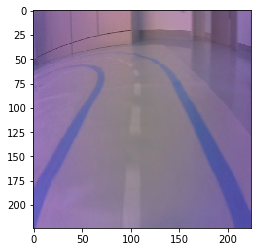

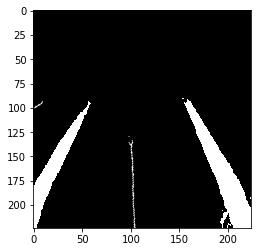

temps d'execution: 0.049121856689453125


In [29]:
randomnb=np.random.randint(750, size=1)
liste_cate = os.listdir('road_following_CircuitRgbOK/apex/')
src = cv2.imread('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]),1)
#src = cv2.imread('road_following_CircuitRgbOK/apex/34_125_a93f7efc-c9f3-11eb-bdd5-a0a4c55ef385.jpg',1)
#src = cv2.imread('road_following_CircuitRgbOK/apex/42_125_961c3b12-c9f3-11eb-bdd5-a0a4c55ef385.jpg',1)
print('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]))
#src = cv2.imread('undistorttest.jpg',1)
plt.imshow(src)
plt.show()

fonction,temps=draw_centerline(src)

plt.imshow(fonction,cmap='gray')
plt.show()

print('temps d\'execution:', temps)


# 2) SOBEL & CONTOURS

road_following_CircuitRgbOK/apex/18_125_a45b0550-c9f3-11eb-bdd5-a0a4c55ef385.jpg


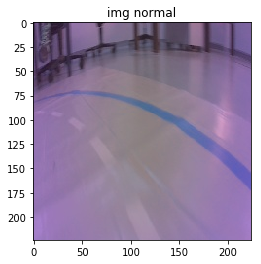

hsv time : 0.001628875732421875
sobel time : 0.002067089080810547


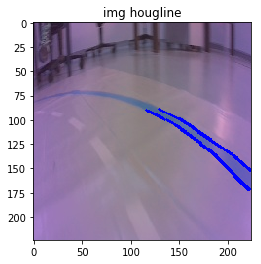

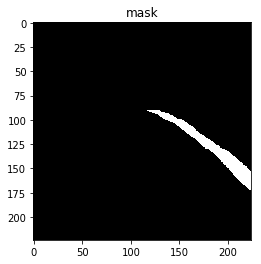

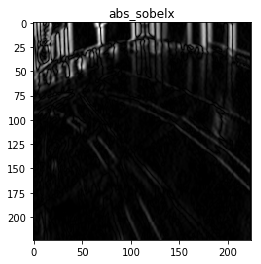

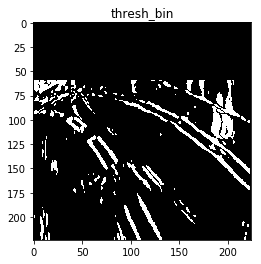

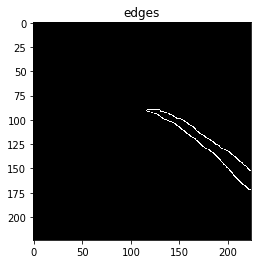

In [253]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
import os

randomnb=np.random.randint(750, size=1)
liste_cate = os.listdir('road_following_CircuitRgbOK/apex/')
img=cv2.imread('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]),1)
imgbw = cv2.imread('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]),0)

#img=cv2.imread('undistorttest.jpg',1)
#imgbw = cv2.imread('undistorttest.jpg',0)
print('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]))

plt.imshow(img)
plt.title("img normal")
plt.show()

t00=time.time()
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
mask= cv2.inRange(hsv, (90, 95,0), (130,255, 255))
mask[0:90,0:224]=0
t11=time.time()
print("hsv time :",t11-t00)

t0=time.time()
sobelx = cv2.Sobel(imgbw,cv2.CV_64F,1,0,ksize=5)
abs_sobelx=np.absolute(sobelx)
ret,thresh_bin=cv2.threshold(abs_sobelx,140,255,cv2.THRESH_BINARY)
thresh_bin[0:60,0:224]=0
t1=time.time()
print("sobel time :",t1-t0)

edges = cv2.Canny(mask,20,50,apertureSize = 3)
#edges[0:90,0:224]=0
minLineLength = 20
maxLineGap = 5

rho = 1  # distance precision in pixel, i.e. 1 pixel
angle = np.pi / 180  # angular precision in radian, i.e. 1 degree
min_threshold = 10  # minimal of votes
line_segments = cv2.HoughLinesP(edges, rho, angle, min_threshold, np.array([]), minLineLength=8, maxLineGap=4)
for line in line_segments:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(img)
plt.title("img hougline")
plt.show()
plt.imshow(mask,cmap='gray')
plt.title("mask")
plt.show()
plt.imshow(abs_sobelx,cmap='gray')
plt.title("abs_sobelx")
plt.show()
plt.imshow(thresh_bin,cmap='gray')
plt.title("thresh_bin")
plt.show()
plt.imshow(edges,cmap='gray')
plt.title("edges")
plt.show()


# 3) CANNY

road_following_CircuitRgbOK/apex/52_125_ad3fa7ca-c9f3-11eb-bdd5-a0a4c55ef385.jpg


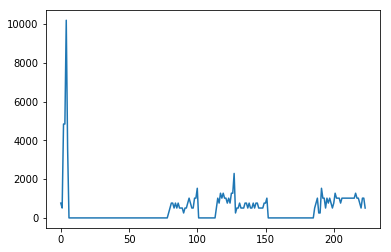

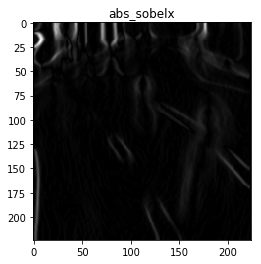

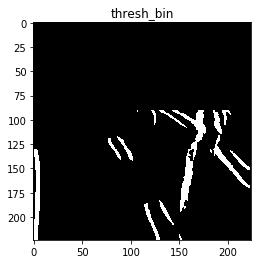

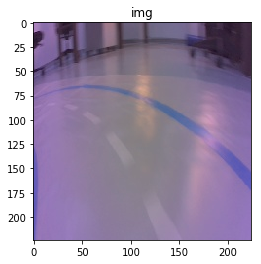

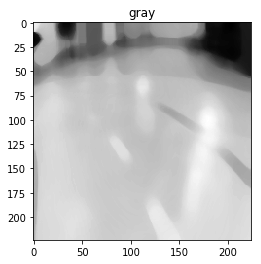

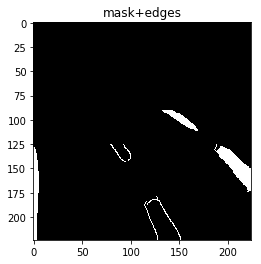

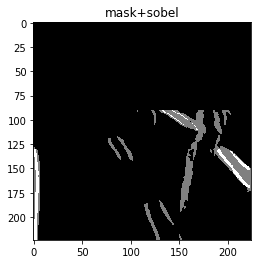

In [318]:
randomnb=np.random.randint(750, size=1)
liste_cate = os.listdir('road_following_CircuitRgbOK/apex/')
img=cv2.imread('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]),1)
#img = cv2.imread('road_following_CircuitRgbOK/apex/51_125_ac3aa596-c9f3-11eb-bdd5-a0a4c55ef385.jpg',1)
print('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]))


blur_img = cv2.medianBlur(img, 15)
gray = cv2.cvtColor(blur_img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,10,30, apertureSize=3)
edges[0:125,0:224]=0

hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
mask= cv2.inRange(hsv, (90, 95,0), (130,255, 255))
mask1=mask+edges

mask1[0:90,0:224]=0


sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
abs_sobelx=np.absolute(sobelx)
ret,thresh_bin=cv2.threshold(abs_sobelx,160,255,cv2.THRESH_BINARY)
thresh_bin[0:90,0:224]=0

mask2=mask+thresh_bin
mask2[0:90,0:224]=0

histogram = np.sum(edges[90:224,0:224], axis=0)
plt.plot(histogram)
plt.show()

plt.imshow(abs_sobelx,cmap='gray')
plt.title("abs_sobelx")
plt.show()
plt.imshow(thresh_bin,cmap='gray')
plt.title("thresh_bin")
plt.show()

plt.imshow(img,cmap='gray')
plt.title('img')
plt.show()

plt.imshow(gray,cmap='gray')
plt.title('gray')
plt.show()

plt.imshow(mask1,cmap='gray')
plt.title('mask+edges')
plt.show()


plt.imshow(mask2,cmap='gray')
plt.title('mask+sobel')
plt.show()



# 4) COLOR SPLIT

road_following_CircuitRgbOK/apex/105_125_9792261e-c9f3-11eb-bdd5-a0a4c55ef385.jpg


(-0.5, 223.5, 223.5, -0.5)

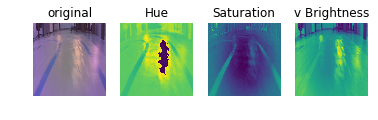

In [269]:
randomnb=np.random.randint(750, size=1)
liste_cate = os.listdir('road_following_CircuitRgbOK/apex/')
img=cv2.imread('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]),1)
imgbw = cv2.imread('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]),0)
img=cv2.imread('road_following_CircuitRgbOK/apex/106_125_9122787e-c9f3-11eb-bdd5-a0a4c55ef385.jpg',1)
print('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]))

h, s, v = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2HSV)) # split into HSV components

plt.subplot(141)
plt.imshow(img)
plt.title("original")
plt.axis('off')
plt.subplot(142)
plt.imshow(h)
plt.title("Hue")
plt.axis('off')
plt.subplot(143)
plt.imshow(s)
plt.title("Saturation")
plt.axis('off')
plt.subplot(144)
plt.imshow(v)
plt.title("v Brightness")
plt.axis('off')

# 5) LANE DETECTION WITH HISTOGRAMM 

### a) Function longest line

In [32]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
import time

def lane_islonger(mask):
    liste=[]
    coffre=[]
    max_len=0
    twolines=False

    histogram = np.sum(mask[90:224,0:224], axis=0)
    for indice in range(0,len(histogram)):
        if histogram[indice]>0:
            coffre.append(indice)
        if (len(coffre)!=0 and len(coffre)>10 and histogram[indice]==0) or (len(coffre)>10 and indice==len(histogram)-1) :
            liste.append(coffre)
            coffre=[]

    if len(liste)>1:
        twolines=True
        for nbliste in range(0,len(liste)-1):
            if len(liste[nbliste])>len(liste[nbliste+1]):
                max_len=nbliste
            else:
                max_len=nbliste+1

    if np.mean(liste[max_len])>112:
        return 'right',twolines,liste[max_len][-1]+1
    else :
        return 'left',twolines,liste[max_len][0]+1
    

### b) Test on pictures 

road_following_CircuitRgbOK/apex/106_125_97a09f96-c9f3-11eb-bdd5-a0a4c55ef385.jpg


resultat fonction== ('left', True, 11)


[    0     0     0     0     0     0     0     0     0     0   765  1275
  1785  2550  3060  3825  4590  5100  5610  6375  6885  7140  7650  8160
  8670  9180  9690 10200 10710 10965 11985 12240 12750 12750 11985 11730
 11475 10710 10710  9945 10200 10200  9435  9690  8925  8670  8415  8160
  8670  8415  7650  8160  7650  7140  7650  7395  7140  6885  7140  7140
  6885  6885  7650  7650  6120  5865  6630  5355  4335  4080  3825  2040
  3315     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0

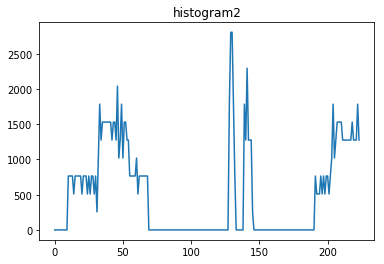

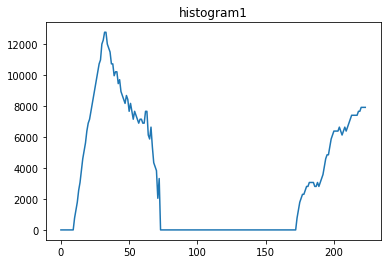

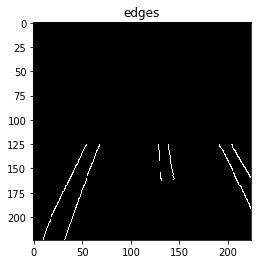

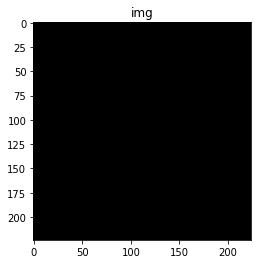

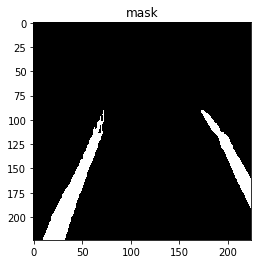

In [100]:

randomnb=np.random.randint(750, size=1)
liste_cate = os.listdir('road_following_CircuitRgbOK/apex/')
img=cv2.imread('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]),1)
#img=cv2.imread('road_following_CircuitRgbOK/apex/41_125_a8f18e2c-c9f3-11eb-bdd5-a0a4c55ef385.jpg',1)
imgbw = cv2.imread('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]),0)
print('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]))

#imgbw = cv2.imread('road_following_CircuitRgbOK/apex/84_125_9bfd73de-c9f3-11eb-bdd5-a0a4c55ef385.jpg',0)

hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
edges = cv2.Canny(imgbw,20,50,apertureSize = 3)
edges[0:125,0:224]=0
mask= cv2.inRange(hsv, (90, 100,0), (130,255, 255))
mask[0:90,0:224]=0

a,b,c=lane_islonger(mask)

print('\n')
print('resultat fonction==',lane_islonger(mask))
print('\n')

histogram = np.sum(mask[90:224,0:224], axis=0)
print(histogram)
print('\n')

img0=img*0
rho = 1  # distance precision in pixel, i.e. 1 pixel
angle = np.pi / 180  # angular precision in radian, i.e. 1 degree
min_threshold = 10  # minimal of votes
line_segments = cv2.HoughLinesP(edges, rho, angle, min_threshold, np.array([]), minLineLength=15, maxLineGap=4)
for line in line_segments:
    if x1==x2:
        continue
    else:
        x1,y1,x2,y2 = line[0]
        print(line[0])
        cv2.line(mask,(x1,y1),(x2,y2),255,2)
        

plt.plot(histogram2)
plt.title('histogram2')
plt.show()

plt.plot(histogram)
plt.title('histogram1')
plt.show()

plt.imshow(edges,cmap='gray')
plt.title('edges')
plt.show()

plt.imshow(img0)
plt.title('img')
plt.show()


plt.imshow(mask,cmap='gray')
plt.title('mask')
plt.show()





road_following_CircuitRgbOK/apex/87_125_b5299662-c9f3-11eb-bdd5-a0a4c55ef385.jpg


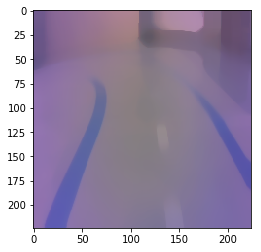

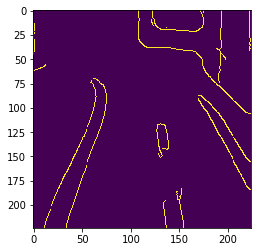

In [166]:
randomnb=np.random.randint(750, size=1)
liste_cate = os.listdir('road_following_CircuitRgbOK/apex/')
img=cv2.imread('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]),1)
#img=cv2.imread('road_following_CircuitRgbOK/apex/49_125_ac595d88-c9f3-11eb-bdd5-a0a4c55ef385.jpg',1)
imgbw = cv2.imread('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]),0)
print('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]))

blur_img = cv2.medianBlur(img, 17)
gray = cv2.cvtColor(blur_img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,3,35, apertureSize=3)

plt.imshow(blur_img)
plt.show()
plt.imshow(edges)
plt.show()

### c) Optimization (time calcul betewwen 2 techniques) 

In [36]:
import time
liste1=[]
liste2=[]
randomnb=np.random.randint(750, size=700)
liste_cate = os.listdir('road_following_CircuitRgbOK/apex/')
#imgbw = cv2.imread('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]),0)
#print('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(randomnb)]))

for i in randomnb:
    img=cv2.imread('road_following_CircuitRgbOK/apex/'+str(liste_cate[int(i)]),1)

    #imgbw = cv2.imread('road_following_CircuitRgbOK/apex/84_125_9bfd73de-c9f3-11eb-bdd5-a0a4c55ef385.jpg',0)

    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask= cv2.inRange(hsv, (90, 100,0), (130,255, 255))
    mask[0:90,0:224]=0

    histogram = np.sum(mask[mask.shape[0]//2:,:], axis=0)

    t0=time.time()
    lane_islonger(mask)
    t1=time.time()
    liste1.append(t1-t0)

    t00=time.time()
    if np.max(histogram[0:100])>0 and np.max(histogram[100:224])>0:
        print('true')
    if np.max(histogram[0:100])>np.max(histogram[100:224]):
        print(i)                
    t11=time.time()
    liste2.append(t11-t00)


print(np.mean(liste1))
print(np.mean(liste2))
    
plt.imshow(img,cmap='gray')
plt.title('img')
plt.show()

plt.imshow(mask,cmap='gray')
plt.title('mask')
plt.show()

plt.plot(histogram)
plt.title('histogram')
plt.show()

true
53
true
311
true
697
true
true
true
true
672
true
true
266
true
true
405
true
300
true
318
true
true
true
114
true
405
true
true
416
true
true
726
true
true
521
true
208
true
460
true
378
true
true
695
true
713
true
312
true
148
true
11
true
318
true
120
true
true
195
true
428
true
69
true
true
409
true
true
290
true
true
660
true
300
true
true
true
736
true
152
true
219
true
746
true
163
true
635
true
true
220
true
486
true
158
true
213
true
true
true
true
true
216
true
715
true
37
true
true
true
true
249
true
true
56
true
223
true
true
292
true
551
true
36
true
535
true
414
true
230
true
85
true
true
true
true
true
true
120
true
69
true
430


error: OpenCV(4.5.2) /tmp/pip-req-build-jtk22n5d/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
